In [37]:
import cv2
import matplotlib.pyplot as plt

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [38]:
labels = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella",
    "shoe", "eye glasses", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite",
    "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass",
    "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot",
    "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table",
    "window", "desk", "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave",
    "oven", "toaster", "sink", "refrigerator", "blender", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush", "hair brush"
]





print(len(labels))

labels

91


['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [39]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 00000214B9943DD0>

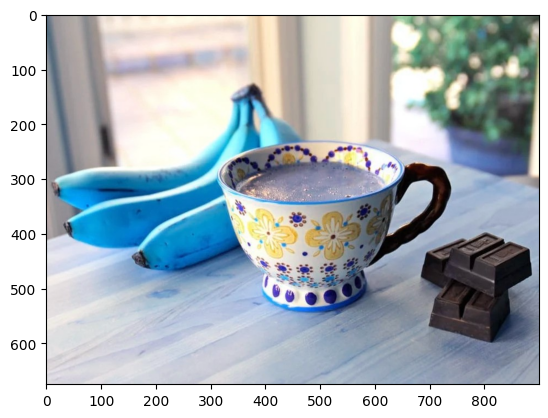

In [40]:
img = cv2.imread('banana.jpg')
plt.imshow(img)

In [41]:
ClassIndex, confidence, bbox  = model.detect(img, confThreshold=0.5)

In [42]:
print(ClassIndex)
for ind in ClassIndex:
    print(labels[ind-1])

[47 52 67]
cup
banana
dining table


In [43]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, labels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=1)

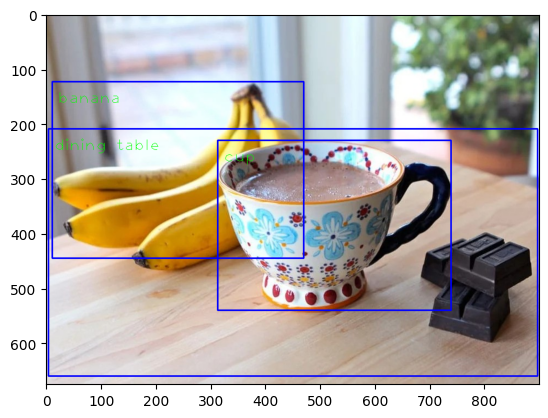

In [44]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [45]:
#video
cap = cv2.VideoCapture('pexels_videos_2880 (1080p).mp4')
if not cap.isOpened():
    cap = cv2.VideoCaputre(0)
if not cap.isOpened():
    raise IOError('can not open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox  = model.detect(frame, confThreshold=0.50)

    print(ClassIndex)

    if(len(ClassIndex) !=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            cv2.rectangle(frame, boxes,(255,0,0),2)
            cv2.putText(frame, labels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=1)
    cv2.imshow('object detection', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[3 8 1 3 1 3 3]
[3 8 1 1]
[3 8 1 3]
[3 1 8]
[3 1 8 8]
[3 1 8]
[3 8 1]
[3 8 1 1]
[3 8 1]
[3 1 8]
[3 1 8 1]
[ 3  1  8 31]
[ 3  1  8  1 31  1]
[ 3  1  1 31  1  8  1]
[ 1  3  1 31  8  1]
[1 3 1 1 8]
[3 1 1 1 8]
[ 3  1  1 31 31]
[ 3  1  1  1 31  8]
[3 1 1 8]
[3 1 1 8]
[ 3  1  1 31 31  8]
[ 1  3  1 31]
[ 1  3  1 31 31]


In [36]:
#webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('can not open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox  = model.detect(frame, confThreshold=0.50)

    print(ClassIndex)

    if(len(ClassIndex) !=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            cv2.rectangle(frame, boxes,(255,0,0),2)
            cv2.putText(frame, labels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=1)
    cv2.imshow('object detection', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
